Load the libraries below.

In [1]:
library("tidyverse")
library("jsonlite")
library("lubridate")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




This function `get_data` will get the new case counts over time from Utah.  

In [2]:
get_data = function() {
    
    state = "UT" # two letter state code 
    
    endpoint = paste0("https://data.cdc.gov/resource/9mfq-cb36.json?state=", state)
    
    # Don't worry about this part for the moment👇
    df = fromJSON(url(endpoint)) %>% 
        mutate(date = as_date(submission_date),
               new_cases = as.numeric(new_case)) %>%
        select(date, new_cases, state) %>%
        arrange(date)
    
    return(df)
    
    }

In [4]:
get_data = function(state_code) {
    
#     state = "UT" # two letter state code 
    
    state = state_code
    
    endpoint = paste0("https://data.cdc.gov/resource/9mfq-cb36.json?state=", state)
    
    # Don't worry about this part for the moment👇
    df = fromJSON(url(endpoint)) %>% 
        mutate(date = as_date(submission_date),
               new_cases = as.numeric(new_case)) %>%
        select(date, new_cases, state) %>%
        arrange(date)
    
    return(df)
    
    }

Adjust the function above to take a state code as an argument and to set the `state` variable inside the function to the value of the argument.

Hint: here is an example of a function that just takes an argument called `state_code` and returns the value of the `state` variable.

```R
state_code_function = function(state_code) {
    
    state = state_code
    
    return(state)
    
}
```

Use your function to plot new cases over time for any state.

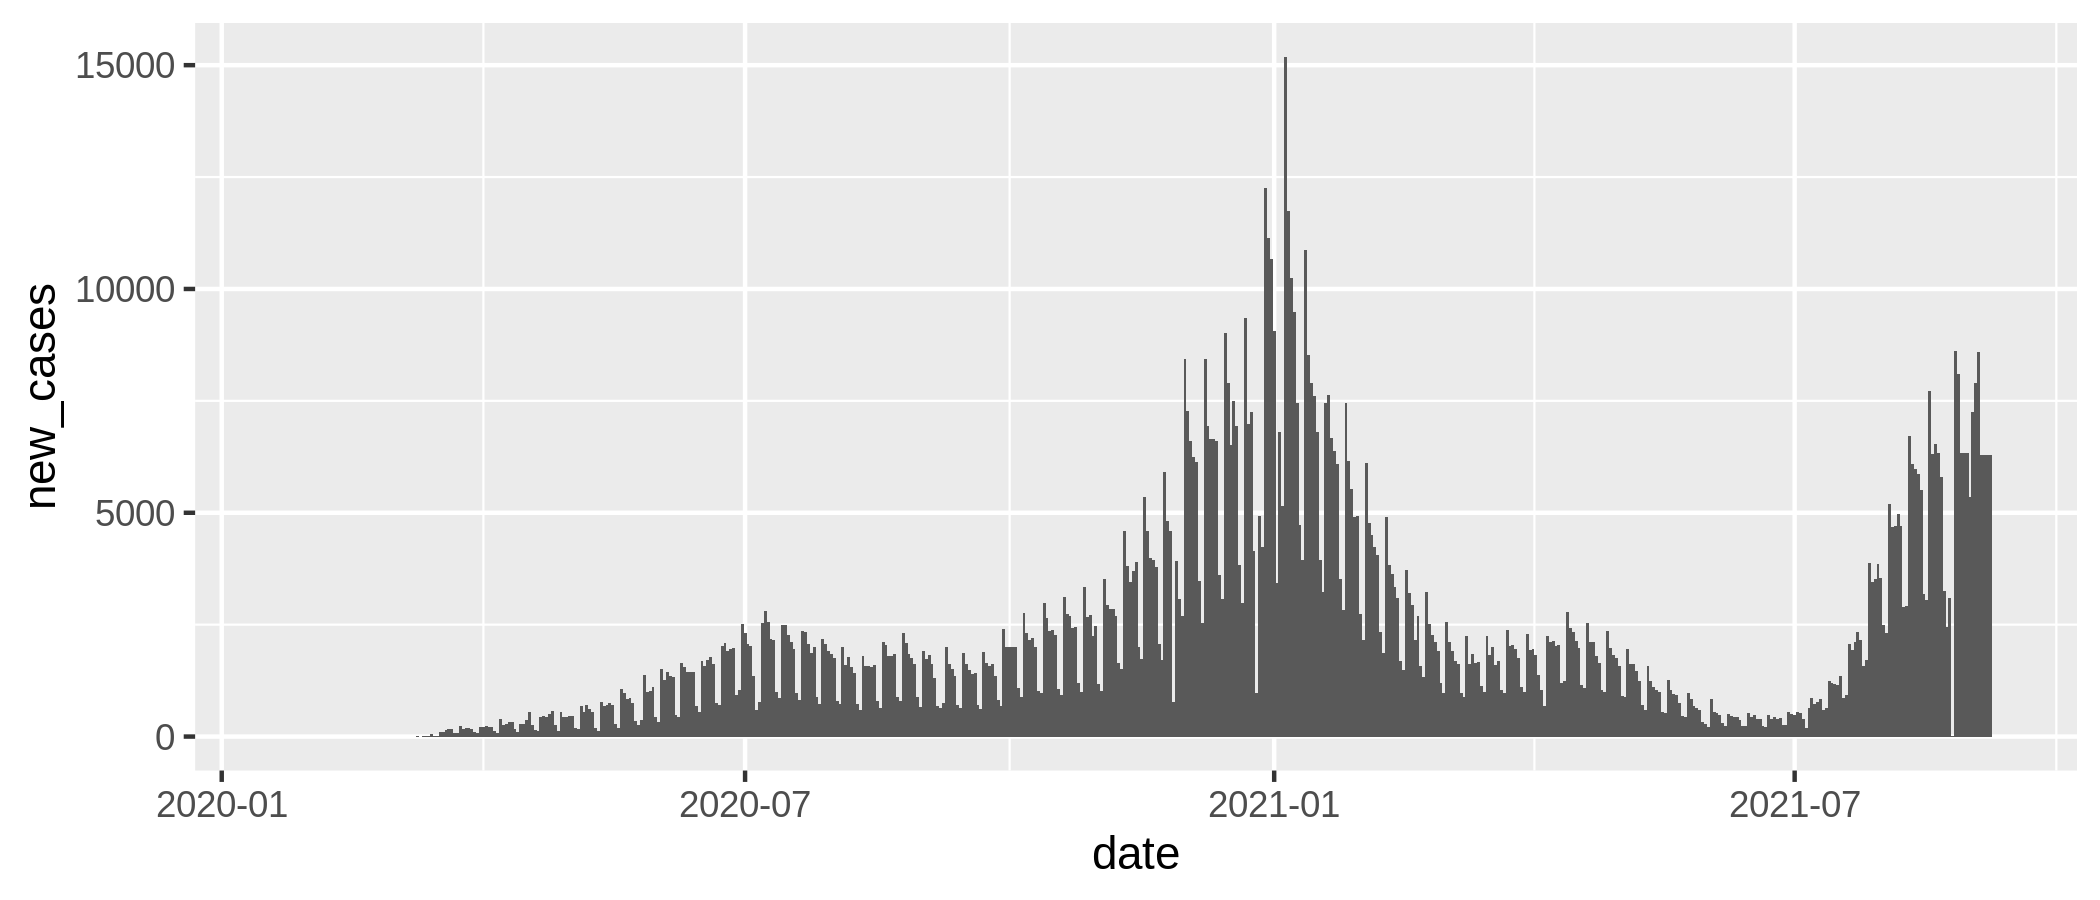

In [6]:
options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

df = get_data("NC")

p = ggplot(df, aes(x = date, y = new_cases))

p = p + geom_col(width = 1)

p

## 🛑 STOP HERE 🛑

If you had data for multiple states in one table, what column would you use to "facet" your data by state?

Using the function you built above, capture the case data for two states in two separate tables.

E.g. for each state do something like this:

```R
df_UT = get_datat("UT")
```

In [14]:
df_SC = get_data(state_code = 'SC')

df_SC %>% head

df_NC = get_data(state_code = 'NC')

df_NC %>% head

,date,new_cases,state
,<date>,<dbl>,<chr>
1,2020-01-22,0,SC
2,2020-01-23,0,SC
3,2020-01-24,0,SC
4,2020-01-25,0,SC
5,2020-01-26,0,SC
6,2020-01-27,0,SC


,date,new_cases,state
,<date>,<dbl>,<chr>
1,2020-01-22,0,NC
2,2020-01-23,0,NC
3,2020-01-24,0,NC
4,2020-01-25,0,NC
5,2020-01-26,0,NC
6,2020-01-27,0,NC


In [17]:
final = rbind(df_NC, df_SC)
final

date,new_cases,state
<date>,<dbl>,<chr>
2020-01-22,0,NC
2020-01-23,0,NC
2020-01-24,0,NC
2020-01-25,0,NC
2020-01-26,0,NC
2020-01-27,0,NC
2020-01-28,0,NC
2020-01-29,0,NC
2020-01-30,0,NC


We can concatenate these two tables using the `rbind` function. Read the help documentation for `rbind` to see how it works, then concatenate your two tables. 

In [ ]:
# In the lab interface use help(rbind) %>% print

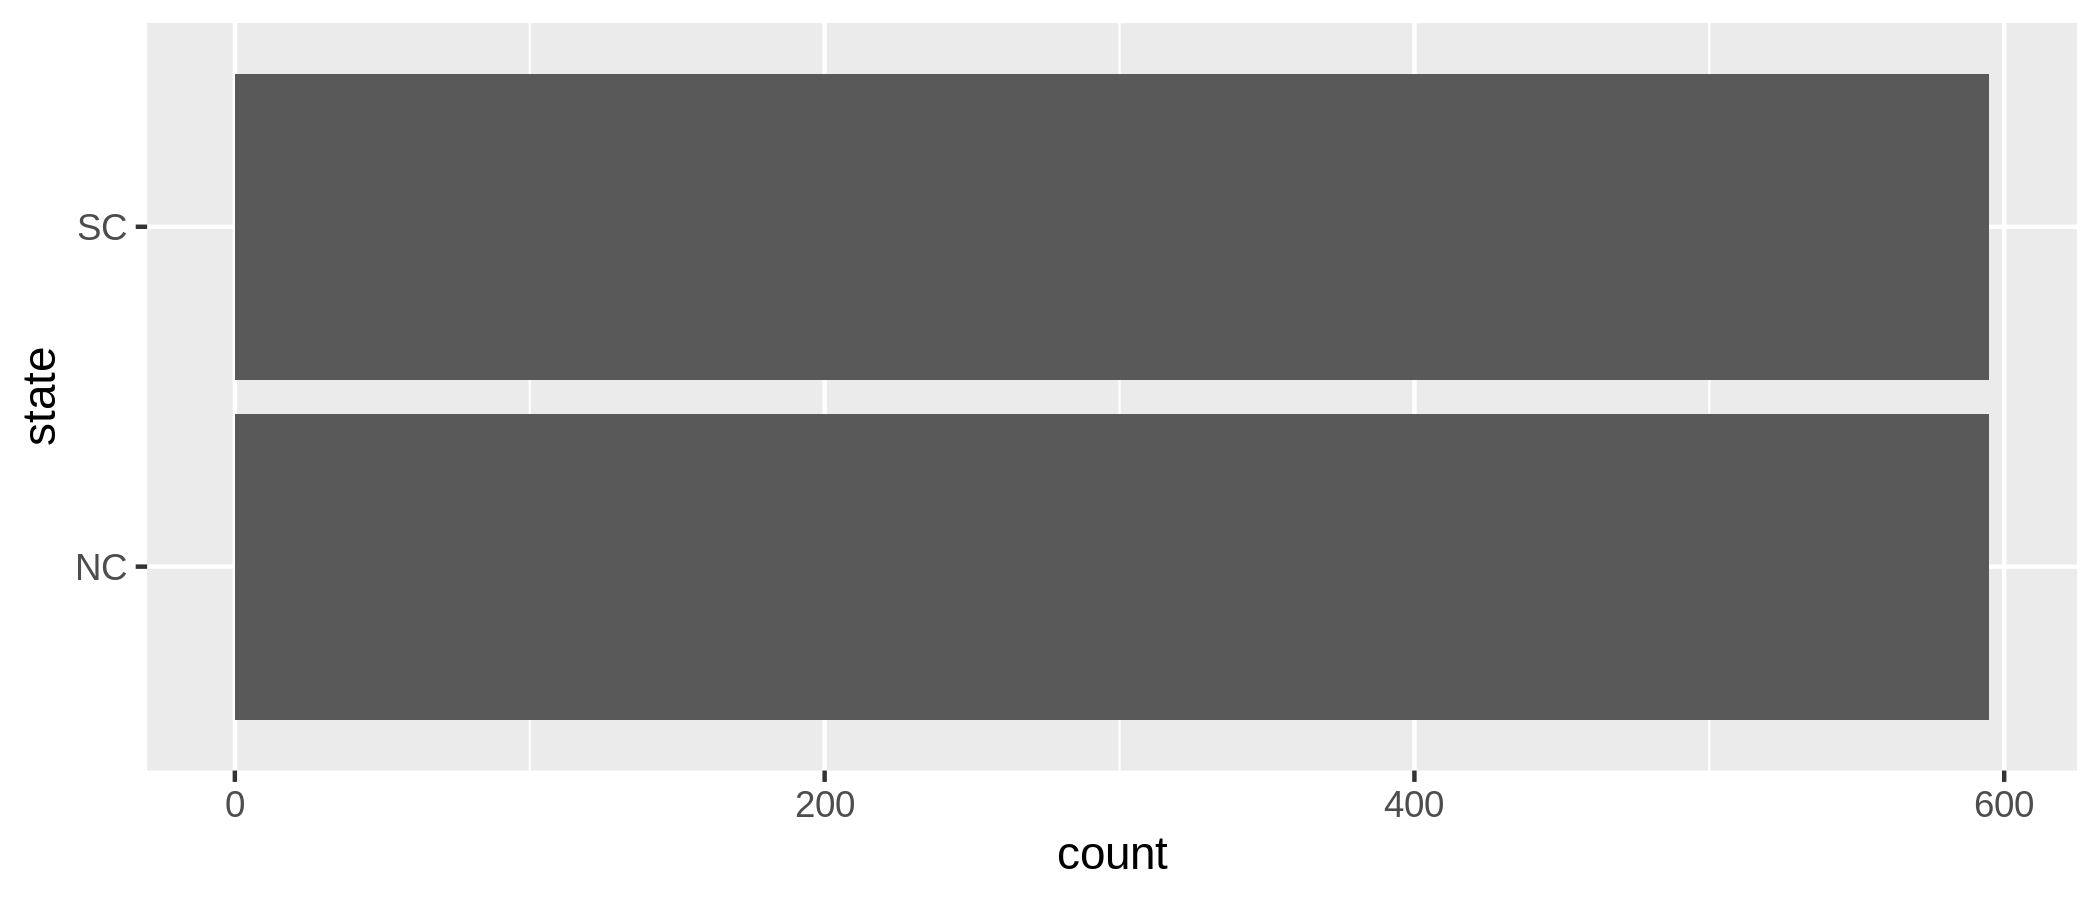

In [21]:
# concatenate your tables here

final = rbind(df_NC, df_SC)

p = ggplot(final, aes(y = state))

p = p + geom_bar()

p

Use `geom_bar` to confirm that you indeed have two states in your concatenated table.

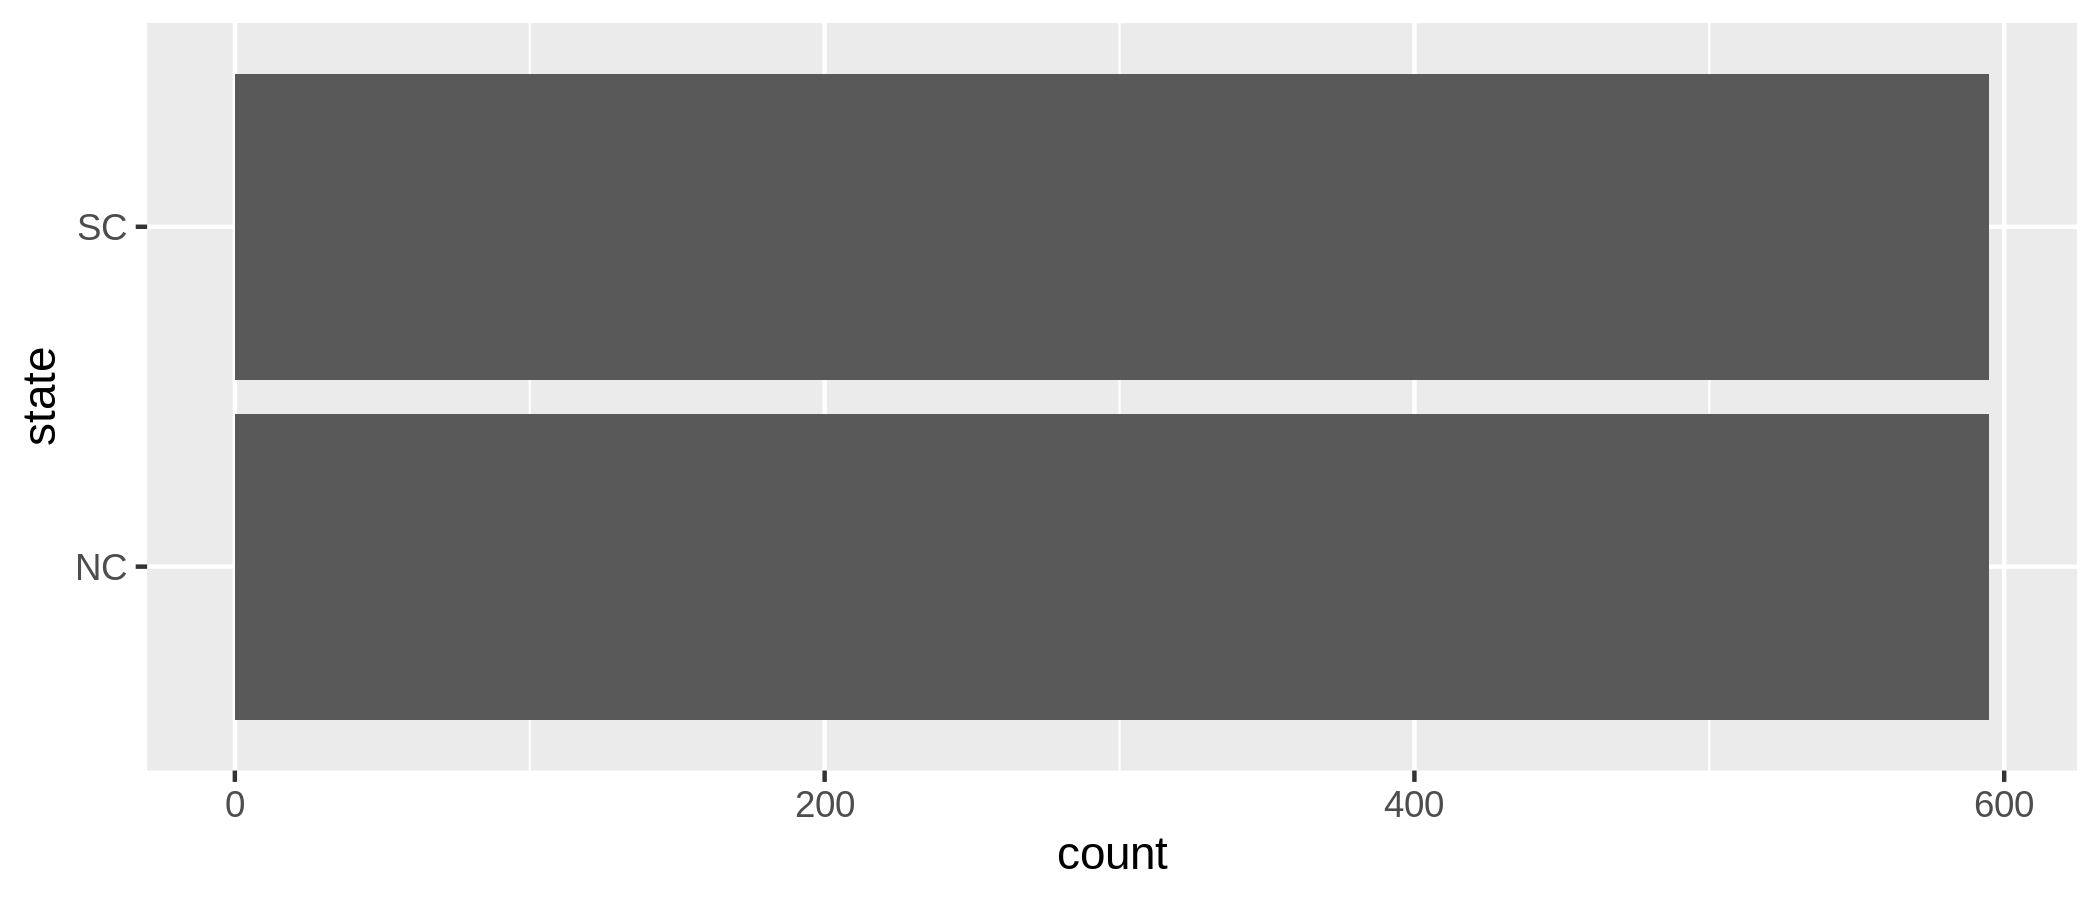

In [21]:
# concatenate your tables here

final = rbind(df_NC, df_SC)

p = ggplot(final, aes(y = state))

p = p + geom_bar()

p

Make the new cases over time chart like we did above but this time `facet` by state.

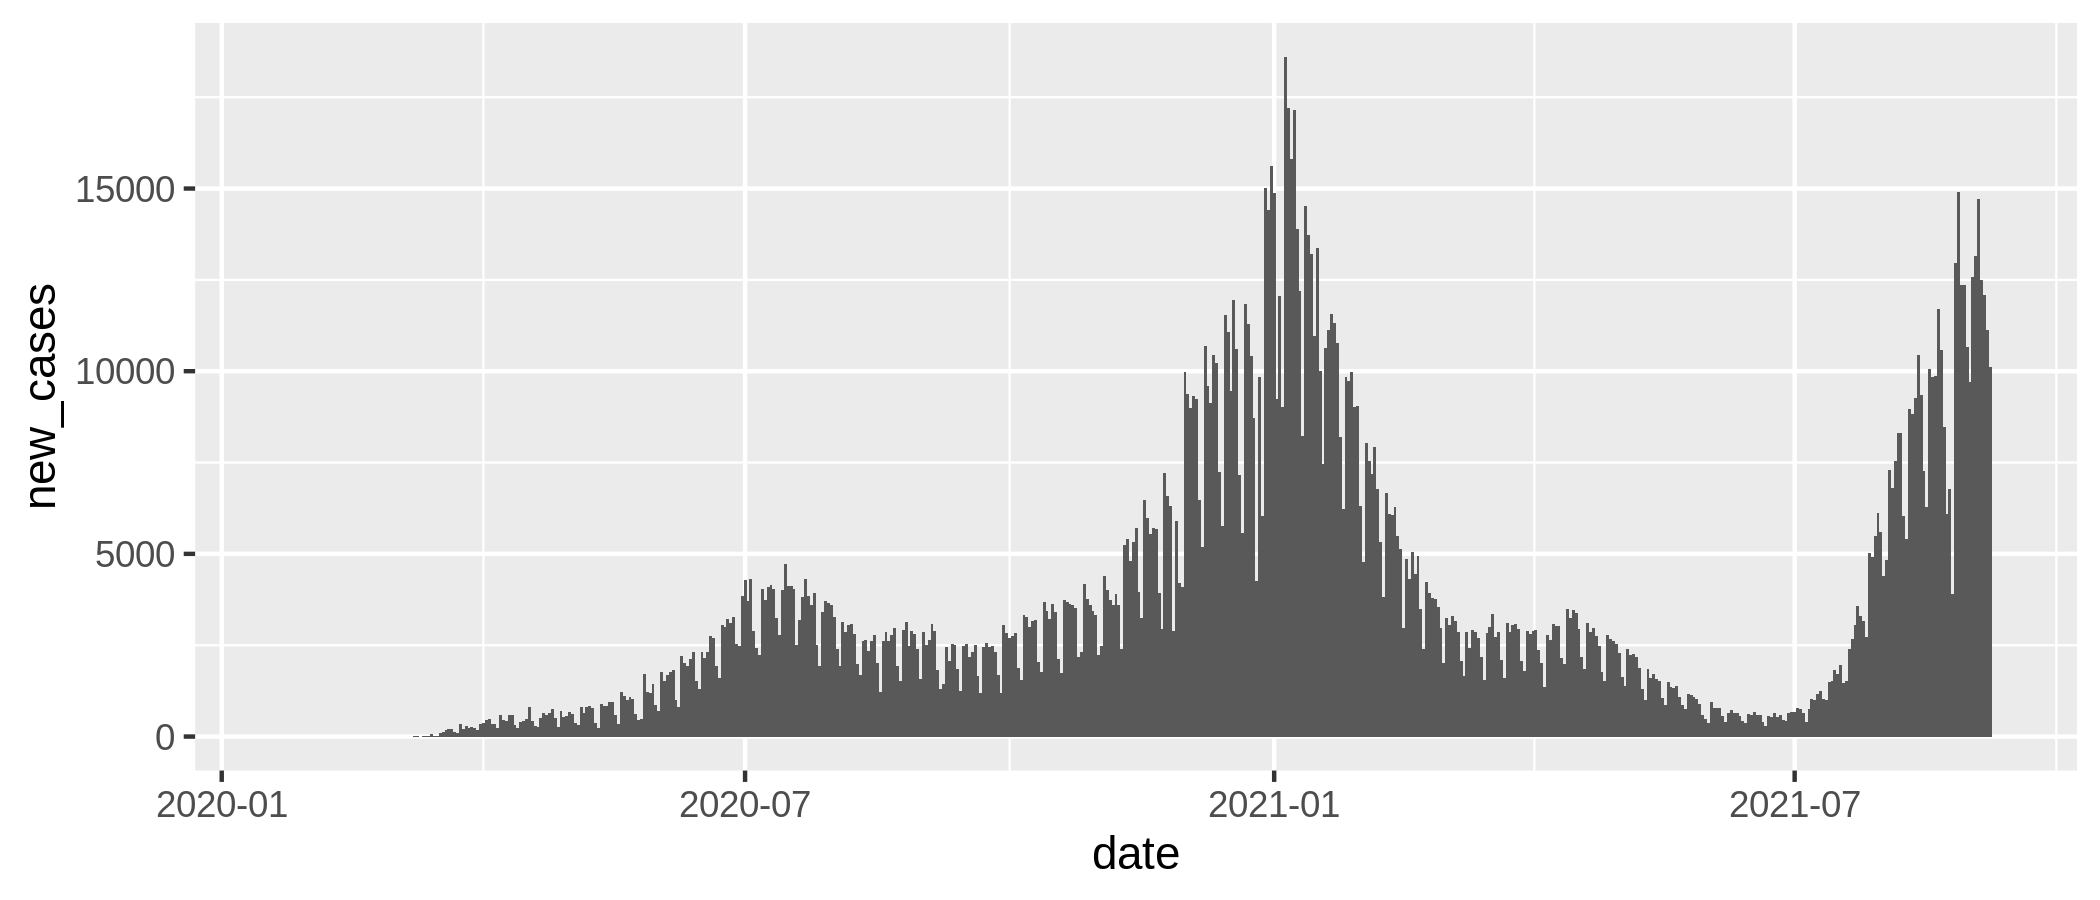

In [22]:

options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

p5 = ggplot(final, aes(x = date, y = new_cases))

p5 = p5 + geom_col(width = 1)

p5

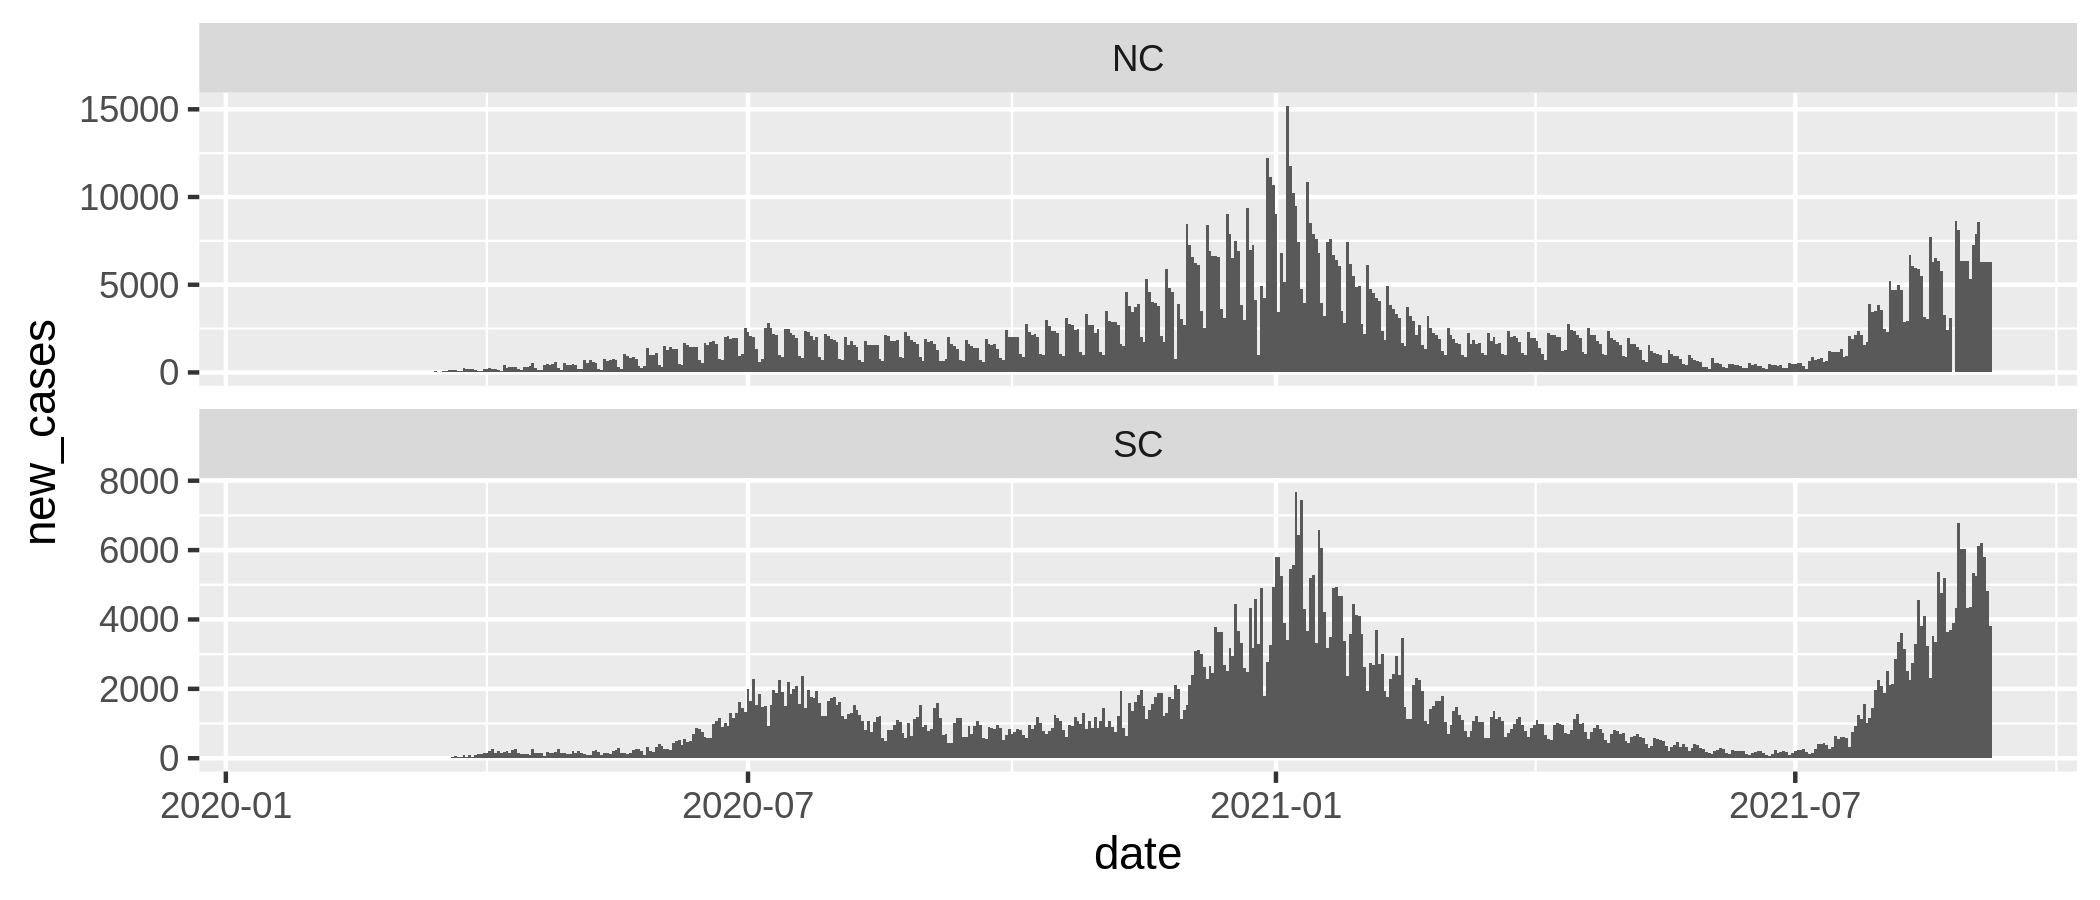

In [28]:

options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

p5 = ggplot(final, aes(x = date, y = new_cases))

p5 = p5 + geom_col(width = 1)

p5 = p5 + facet_wrap(~state, ncol = 1, scales = "free_y") #free_y lets the y axis be decided by R for each group free general is for both x and y

#remember that facet_wrap concatenates the graphs but ncol stacks them on top of each other

#in the aes function if you do fill = state also you have to put alpha = 0.5 in geom col to change the opacity

p5

In [ ]:

options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

p6 = ggplot(final, aes(x = date, y = new_cases, fill = state))

p6 = p6 + geom_col(width = 1, position = 'dodge') #dodge offsets the graphs by a little so that they are not overlapping 
#- if you do not use this then the bars stack on top of each other
# He later looked at this again, and then said that we should use identity
# The other options are dodge, stack and identity so far
p6

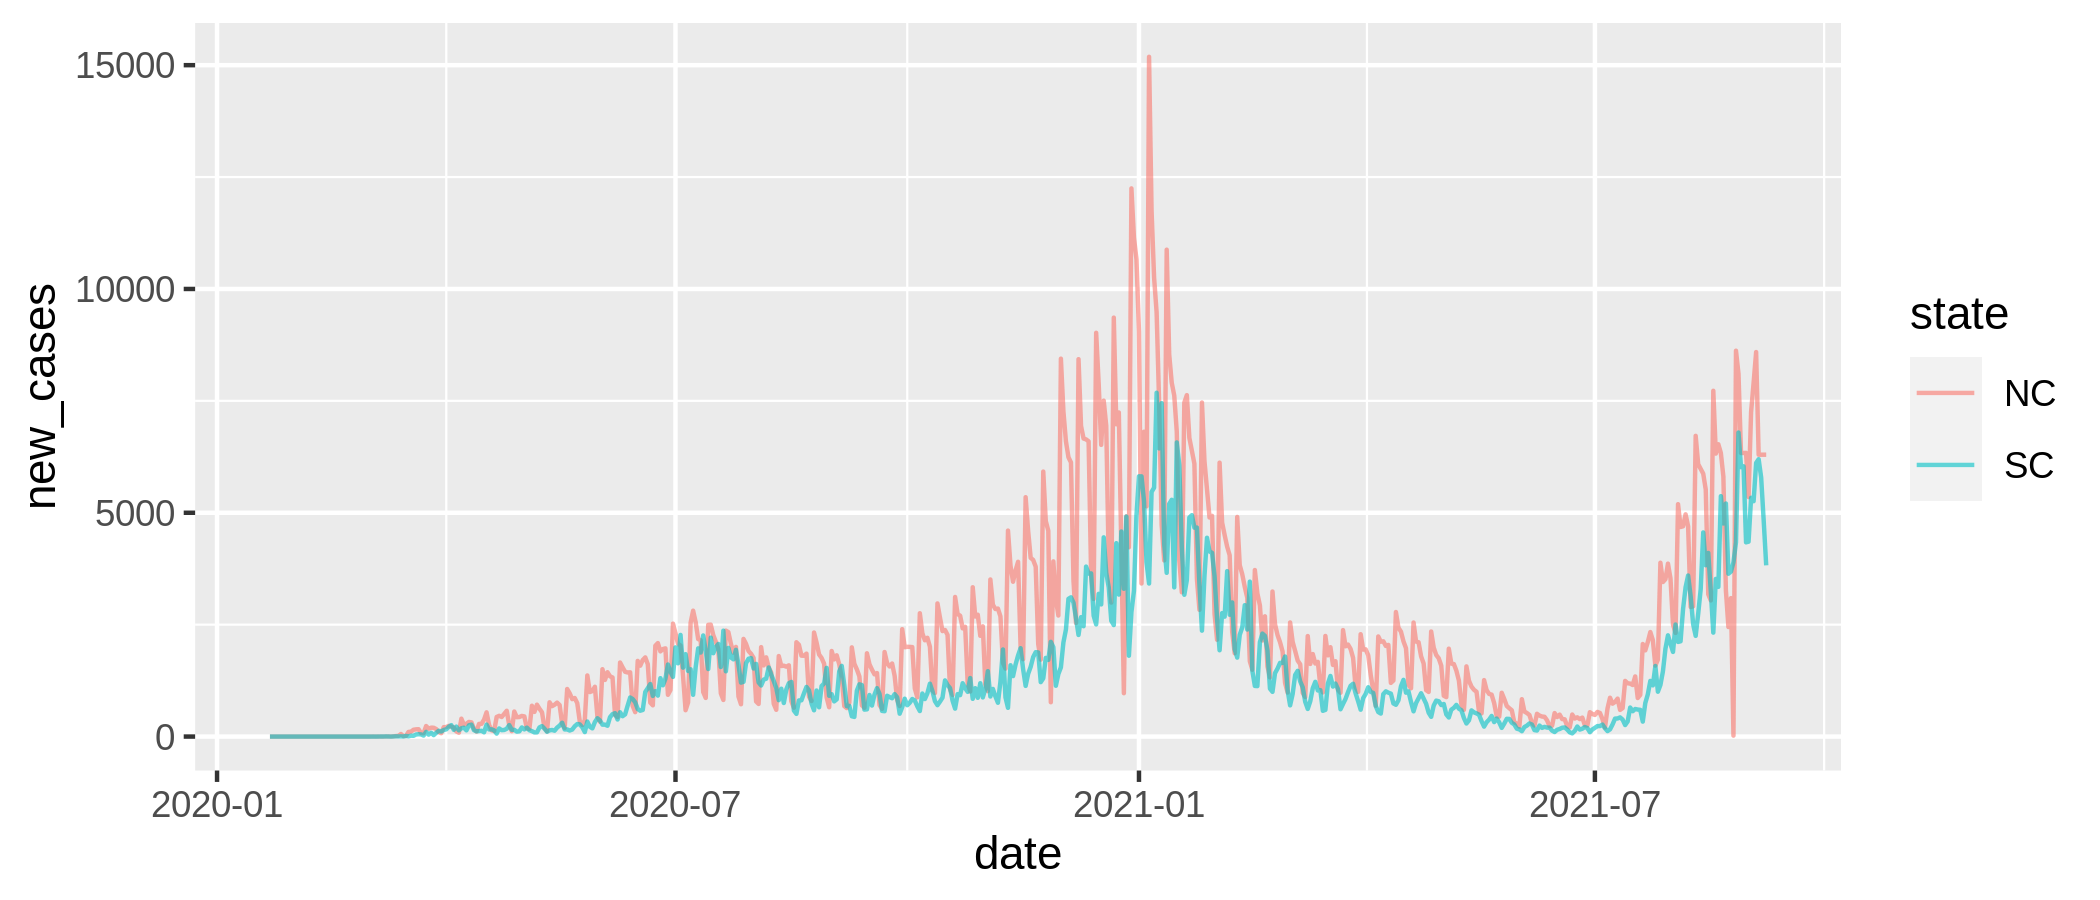

In [34]:

options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

p5 = ggplot(final, aes(x = date, y = new_cases, color = state)) #We tried to use group = state but both lines were black so we used color = instead

p5 = p5 + geom_line(alpha = 0.6)

p5